In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

data = pd.read_csv("/home/sanjana/Homelane/Datasets/usecase2_reportdata.csv")
print(data.head(20))

print(data.shape)
print('*'*60)
print(data.describe())
print('*'*60)
print(data.dtypes)
print('*'*60)
print(data.info())

/home/sanjana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,40,41,42,43,48,49,50,51,52,53,54,55,56,57,58,59,60,61,66,67,68,70,71,72,73,76,77,78,79,80,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   Created_Date   Source               Name       Phone  \
0    12/17/2018  Website       Sambhav Garg  9582325040   
1    12/17/2018  Website           hlgki gk  9100000000   
2    12/17/2018  Website         sreekhanth  8121445564   
3    12/17/2018  Website       chandrasekar  9543029262   
4    12/18/2018  Website             anurag  9871192009   
5    12/18/2018  Website      Ridhima Gupta  9818866775   
6    12/18/2018  Website             rishab  8851818085   
7    12/18/2018  Website       Swati Thapar  9654342661   
8    12/18/2018  Website  Aarthy Manivannan  6385463512   
9    12/18/2018  Website    Shraddha Andani  9871873690   
10   12/18/2018  Website      amar tripathi  8765221500   
11   12/18/2018  Website     Disha Kasliwal  9604151000   
12   12/18/2018  Website                 Kb  9591515962   
13   12/18/2018  Website       Priyanka Dua  8059000453   
14   12/18/2018  Website      Santosh Ubale  9607502602   
15   12/18/2018  Website       kodanda rama  9845407100 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11369 entries, 0 to 11368
Data columns (total 93 columns):
Created_Date                                        11360 non-null object
Source                                              11341 non-null object
Name                                                11368 non-null object
Phone                                               11306 non-null object
Email                                               11368 non-null object
City                                                11342 non-null object
Qualification                                       6702 non-null object
Exp                                                 7694 non-null object
Basic_Qualification_Survey                          11316 non-null object
Candidate_Status                                    11364 non-null object
Agent_Name                                          4153 non-null object
Description                                         3753 non-null object
Candida

# Data Preparation

In [2]:
#deriving new column Final_Status from existing columns Candidate_Status and Candidate_Stage with the help of metadata - Final_Status.csv

data2 = pd.read_csv("/home/sanjana/Homelane/extra/myEDA/Final_Status.csv")
print(data2.head())
final_status = pd.merge(data, data2, on=['Candidate_Status','Candidate_Stage'], how='left')
final_status['Final_Status'].value_counts()

                                    Candidate_Status Candidate_Stage  \
0                     Appointment Confirmed-Job Fair        Job Fair   
1  Appointment Confirmed-Job Fair-Awaiting Comple...        Job Fair   
2                                  Appointment Fixed      Fresh Lead   
3                                Case Study Received      Case Study   
4                                         Fresh Lead      Fresh Lead   

  Final_Status  
0  In Progress  
1  In Progress  
2  In Progress  
3  In Progress  
4  In Progress  


In Progress    10035
Rejected        1320
Selected           3
Name: Final_Status, dtype: int64

In [3]:
#data preparation for Qualification column

#convert to lower case
final_status['Qualification'] = final_status['Qualification'].str.lower()
#convert multiple spaces to single space
final_status['Qualification'] = final_status['Qualification'].str.replace(r"\s+", " ")
#replace spl charaters with null value
final_status['Qualification'] = final_status['Qualification'].str.replace(r"\.|\+|\$|\,|\=|\%|\$|\<|\>|\?|\'|\"|\\|\/|\{|\}|\[|\]|\-|\(|\)|\!|\@|\#|\^|\*|\:|\;|\|","")
print(final_status)

list_qualifications = final_status['Qualification'].unique()
print(len(list_qualifications))

               Created_Date          Source                  Name       Phone  \
0                12/17/2018         Website          Sambhav Garg  9582325040   
1                12/17/2018         Website              hlgki gk  9100000000   
2                12/17/2018         Website            sreekhanth  8121445564   
3                12/17/2018         Website          chandrasekar  9543029262   
4                12/18/2018         Website                anurag  9871192009   
5                12/18/2018         Website         Ridhima Gupta  9818866775   
6                12/18/2018         Website                rishab  8851818085   
7                12/18/2018         Website          Swati Thapar  9654342661   
8                12/18/2018         Website     Aarthy Manivannan  6385463512   
9                12/18/2018         Website       Shraddha Andani  9871873690   
10               12/18/2018         Website         amar tripathi  8765221500   
11               12/18/2018 

In [4]:
#data preparation for City column

#lower case
final_status['City'] = final_status['City'].str.lower()
final_status['City'] = final_status['City'].str.replace(r"\s+", " ")

# handkling bengauru, ahmedabad, dehradun
final_status['City']= final_status['City'].str.replace(r"bengaluru|bangalore", "bengaluru")
final_status['City']= final_status['City'].str.replace(r"ahmedabad|ahemdabad", "ahmedabad")
final_status['City']= final_status['City'].str.replace(r"dehra dun", "dehradun")
final_status['City']= final_status['City'].str.replace(r"maunath bhanjan", "mau")#this is a town not city in UP

#replacing columns with numerical or '@' entries into nan
i = 0
while i < len(final_status['City']):
    res = bool(re.search('\d+|\@|\-',str(final_status['City'][i])))
    if res==True:
        final_status['City'][i] = np.nan
    i += 1
    
#extracts only first word - i.e., city name
final_status['City']= final_status['City'].str.replace(r"[ ,.].*", "")

#others
final_status['City']= final_status['City'].str.replace(r"india|com|lose|others|iâ€™m|kerala","")
final_status['City'].value_counts()

/home/sanjana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


delhi           3020
mumbai          2455
pune            1637
bengaluru       1425
chennai         1201
hyderabad        939
kolkata          363
                  24
ahmedabad         10
dehradun           8
kochi              8
surat              5
nagpur             5
kolhapur           4
goa                4
jaipur             4
ranchi             3
patna              3
kozhikode          3
udaipur            3
thrissur           3
rajkot             3
nellore            3
navsari            2
gwalior            2
palwal             2
narnaul            2
jalgaon            2
kasaragod          2
sangli             2
                ... 
kuala              1
siliguri           1
khurja             1
hapur              1
gandhinagar        1
moradabad          1
bikaner            1
sion               1
faridabad          1
shamli             1
sujangarh          1
shahdra            1
chengalpattu       1
bhopal             1
chirimiri          1
canada             1
vasaivirar   

In [5]:
#Experience column 
#creating a new data frame - splitting it into two columns yrs|months. Then concatenating it to the actual dataframe.

#creating a new data frame
experience=final_status["Exp"]
experience = experience.str.replace('I’m a Fresher','0')

#splitting it into years and months
experience=pd.DataFrame(experience)
experience = experience['Exp'].str.split("Year|years|yr|year|YEARS", n = 1, expand = True) 

#handling all the expressions of year column
experience[0] = experience[0].str.replace('to| - ','-')
experience[0] = experience[0].str.replace(r"\_","")
experience[0] = experience[0].str.replace(r"\s", "")


i = 0
while i < len(experience[0]):
    res = bool(re.search('[a-zA-Z]|\+|\<|\>',str(experience[0][i])))
    if res==True:
        experience[0][i] = np.nan
    i += 1
    
#handling all the expressions of month column
experience[1] = experience[1].str.replace(r'[a-zA-Z]|\+|\<|\>|\(|\)|\_|\__',"")
experience[1] = experience[1].str.replace(r"\s", "")

# Concatenating year and month into alltogether.
experience['AllTogether'] = experience[0].str.cat(experience[1], sep='.')

#Adding 'experience['AllTogether']' as experience to final_status
final_status["Experience"]=experience["AllTogether"]

In [6]:
#data preparation for Qualification column

#convert to lower case
final_status['Qualification'] = final_status['Qualification'].str.lower()
#convert multiple spaces to single space
final_status['Qualification'] = final_status['Qualification'].str.replace(r"\s+", " ")
#replace spl charaters with null value
final_status['Qualification'] = final_status['Qualification'].str.replace(r"\.|\+|\$|\,|\=|\%|\$|\<|\>|\?|\'|\"|\\|\/|\{|\}|\[|\]|\-|\(|\)|\!|\@|\#|\^|\*|\:|\;|\|","")
print(final_status)

#aggregate studies into 6 groups 
diploma = ['diploma']
degree=['bachelors', 'archdegre', 'bachelor', 'eee', 'engineering', 'bdesign', 'b arch', 'b a', 'civil', 'degree', 'b tech','bsc', 'b com', 'be','ba','btech','commerce', 'barch', 'hsc' , 'b sc', 'h sc', 'graduate bebtech', 'graduate barch', 'arch degree', 'iddegree', 'archdegree', 'ssc' , 'bachelor of science architectural', 'bcom','barch']
masters=['masters', 'postgraduate m arch', 'm arch', 'mtech', 'pg', 'pgd', 'ma', 'msc', 'me', 'mba', 'ms', 'master', 'mcom']
courses=['no formal education but has work experience in', 'autocad', '3d max','interior','construction management','management','s s c saraswati mandir', '3yrs professional course of interior design interior design']
other=['others','education', 'sslc', 'puc', 'cbse', 'science', 'higher secondary', 'school certificate', '10 pass', '12th pass', 'no degree', 'rbcin89938993gmailcom']
#unkowns gruops put as others
others=['architect','fresher','jrdesign engineer','engg','pune','academic','site coordinator with designer ','h s c','associate','iti','thanks','design','darch','vfx','pratical experience','fine arts','graduate','design drafting','bdes','architecture','iid','design & decoration','certificate  planning','industrial','22years 6months','5years','2years','6years','47years','2yrs','5 years','1 year','15yrs','16 yrs','45 years','2 years','first year of interuor design','english','sketchup','mdes','inter','landscape designer','vocational  design','1year','7 years','1year10months','4 years','b des','certificate  institution']


#each groups seperated by "|" for purpose of where()
diploma = '|'.join(diploma)
degree = '|'.join(degree)
masters='|'.join(masters)
courses='|'.join(courses)
other='|'.join(other)
others='|'.join(others)

#Assigned groups based on their educatiom
#new column "Degree" is added to final_status
final_status["Degree"]=pd.np.where(final_status['Qualification'].str.contains(other,na=False),"Other",
                                         pd.np.where(final_status['Qualification'].str.contains(diploma,na=False),"Diploma",
                                                                 pd.np.where(final_status['Qualification'].str.contains(courses,na=False),"Course",
                                                                             pd.np.where(final_status['Qualification'].str.contains(degree,na=False),"Degree",
                                                                                         pd.np.where(final_status['Qualification'].str.contains(masters,na=False),"Masters",
                                                                                                     pd.np.where(final_status['Qualification'].str.contains(others,na=False),"others",None))))))



#Create groups based on Specialization
architecture=['architecture design', 'architecturedesign', 'plan architecture', 'arch','architect']
interior=['interior design – id', 'iddiploma', 'interior', 'iddegree', 'interior designing & decoration', 'visual arts and inderior designer', 'inrerior designing', 'interior and product design', 'interior designer and decorater', 'site coordinator with designer']
civil = ['civil engineer', 'civil']
industrial = ['industrial designer']
construction=['construction / construction management']
designing=['design/degree/diploma', 'design', 'textile and coloring and designing']
project=["project and construction management"]
d_max=["3d max"]
jrdesign_engineer=["jrdesign engineer"]
product_and_tool=['product and tool']
commerce=["commerce"]
mechanical_engineering=["mechanical engineering"]
autocad_and_computers=['autocad', 'computers']
electrical_and_engineering=["electrical engineering"]
architectural_conservation=["architectural conservation"]
arts=["arts"]
animation=["animation"]

#each groups seperated by "|" for purpose of where()
architecture = '|'.join(architecture)
interior = '|'.join(interior)
civil='|'.join(civil)
industrial='|'.join(industrial)
construction = '|'.join(construction)
designing = '|'.join(designing)
project='|'.join(project)
d_max='|'.join(d_max)
jrdesign_engineer='|'.join(jrdesign_engineer)
product_and_tool = '|'.join(product_and_tool)
commerce = '|'.join(commerce)
mechanical_engineering='|'.join(mechanical_engineering)
autocad_and_computers='|'.join(autocad_and_computers)
electrical_and_engineering='|'.join(electrical_and_engineering)
architectural_conservation='|'.join(architectural_conservation)
arts='|'.join(arts)
animation='|'.join(animation)

#Assigned groups based on their specialization
#new column "Specialization" is added to final_status
final_status["Specialization"]=pd.np.where(final_status["Qualification"].str.contains(architecture,na=False),"architecture",
                                         pd.np.where(final_status['Qualification'].str.contains(interior,na=False),"interior",
                                                                 pd.np.where(final_status["Qualification"].str.contains(civil,na=False),"civil",
                                                                             pd.np.where(final_status['Qualification'].str.contains(industrial,na=False),"industrial",
                                                                                                     pd.np.where(final_status['Qualification'].str.contains(autocad_and_computers,na=False),"autocad_and_computers",
                                                                                                                 pd.np.where(final_status['Qualification'].str.contains(construction,na=False),"construction",
                                                                                                                             pd.np.where(final_status['Qualification'].str.contains(designing,na=False),"designing",
                                                                                                                                         pd.np.where(final_status['Qualification'].str.contains(project,na=False),"project",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(d_max,na=False),"3d_max",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(jrdesign_engineer,na=False),"jrdesign_engineer",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(electrical_and_engineering,na=False),"electrical_and_engineering",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(product_and_tool,na=False),"product_and_tool",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(commerce,na=False),"commerce",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(mechanical_engineering,na=False),"mechanical_engineering",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(architectural_conservation,na=False),"architectural_conservation",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(arts,na=False),"arts",
                                                                                                                                                     pd.np.where(final_status['Qualification'].str.contains(animation,na=False),"animation",None)))))))))))))))))

               Created_Date          Source                  Name       Phone  \
0                12/17/2018         Website          Sambhav Garg  9582325040   
1                12/17/2018         Website              hlgki gk  9100000000   
2                12/17/2018         Website            sreekhanth  8121445564   
3                12/17/2018         Website          chandrasekar  9543029262   
4                12/18/2018         Website                anurag  9871192009   
5                12/18/2018         Website         Ridhima Gupta  9818866775   
6                12/18/2018         Website                rishab  8851818085   
7                12/18/2018         Website          Swati Thapar  9654342661   
8                12/18/2018         Website     Aarthy Manivannan  6385463512   
9                12/18/2018         Website       Shraddha Andani  9871873690   
10               12/18/2018         Website         amar tripathi  8765221500   
11               12/18/2018 

Creating a new DataFrame "demo1" with derived columns and columns with <50% missing values initially

In [7]:
col=['Name','Email','Phone','Degree','City','Specialization','Experience','Qualification','Final_Status','Exp','Basic_Qualification_Survey','Job_Fair_Date_Targetted','Source','Created_Date','Candidate_Stage','Candidate_Status']
demo =final_status[col]
#demo.to_excel("demo.xlsx",sheet_name='Sheet1'
demo1 = pd.read_excel("demo.xlsx")
print(demo1.head(20))

    Unnamed: 0               Name                         Email       Phone  \
0            0       Sambhav Garg       SambhavGarg09@gmail.com  9582325040   
1            1           hlgki gk             jhcgjch@gmail.com  9100000000   
2            2         sreekhanth       saisreekhanth@gmail.com  8121445564   
3            3       chandrasekar        chandru29262@gmail.com  9543029262   
4            4             anurag         anuragdec87@gmail.com  9871192009   
5            5      Ridhima Gupta      thedesigncove8@gmail.com  9818866775   
6            6             rishab       rishabjain097@gmail.com  8851818085   
7            7       Swati Thapar     swatithapar0530@gmail.com  9654342661   
8            8  Aarthy Manivannan    Manivannanaarthy@gmail.com  6385463512   
9            9    Shraddha Andani   shraddha.andani94@gmail.com  9871873690   
10          10      amar tripathi      amartripathi23@gmail.com  8765221500   
11          11     Disha Kasliwal  dishaskasliwal229

In [8]:
import re
demo1['Job_Fair_Date_Targetted'] = demo1['Job_Fair_Date_Targetted'].str.replace(r"Not found!| ", "")
#demo['Job_Fair_Date_Targetted'].unique()

demo1['Created_Date_Copy'] = pd.to_datetime(demo1['Created_Date'])
demo1['Created_Date'] = pd.to_datetime(demo1['Created_Date'])
demo1['Job_Fair_Date_Targetted'] = pd.to_datetime(demo1['Job_Fair_Date_Targetted'])
demo1.info()


#deleting two created_dates greater than current date from df
a = ['2019-12-03 00:00:00','2019-12-07 00:00:00']
demo1 = demo1[~demo1['Created_Date'].isin(a)]

#copy of Created_Date
#demo1['Created_Date_Copy'] = demo1['Created_Date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11369 entries, 0 to 11368
Data columns (total 18 columns):
Unnamed: 0                    11369 non-null int64
Name                          11368 non-null object
Email                         11368 non-null object
Phone                         11306 non-null object
Degree                        6618 non-null object
City                          11229 non-null object
Specialization                5348 non-null object
Experience                    3044 non-null object
Qualification                 6619 non-null object
Final_Status                  11358 non-null object
Exp                           7694 non-null object
Basic_Qualification_Survey    11316 non-null object
Job_Fair_Date_Targetted       10397 non-null datetime64[ns]
Source                        11341 non-null object
Created_Date                  11360 non-null datetime64[ns]
Candidate_Stage               11363 non-null object
Candidate_Status              11364 non-null obje

In [9]:
#creating new columns from "Created_Date" column
#if you don't set Created_Date as index you can approach it this way
demo1['Year'] =demo1['Created_Date'].dt.year
demo1['Month'] = demo1['Created_Date'].dt.month
demo1['Weekday Name'] = demo1['Created_Date'].dt.weekday_name


#drop columns
#demo1 = demo1.drop(['Year','Month','Weekday Name'], axis=1)

#Actions to be performed when you set Created_Date as index
demo1 = demo1.set_index('Created_Date')

demo1.sort_index()

#deriving new column by finding difference
demo1['WaitingDays'] = demo1['Job_Fair_Date_Targetted'] - demo1['Created_Date_Copy']
days = []

for i in range(0,demo1.shape[0]):
    days.append(demo1['WaitingDays'][i].days)
    
demo1['daysDiff']= days

#Binning the daysDiff column
demo1['Binning_dayDiff'] = np.nan
bins = [-50,0,15,30,45,60,75,90,105,120,135,150,165,180,195,200,250]
labels = [">0","0-15","15-30","30-45",'45-60','60-75','75-90','90-105','105-120','120-135','135-150','150-165','165-180','180-195','195-200','200-250']
demo1['Binning_dayDiff'] = pd.cut(demo1['daysDiff'], bins=bins, labels=labels)

demo1 = demo1.drop(['WaitingDays','daysDiff'], axis=1)

# Visualization

In [10]:
demo1['Source'].value_counts()

top_source = ['Website', 'FB/IG','Indeed','Indeed Organic','ODN','Workex','Quikr','Beehive','Referral from Indeed','Referral','Naukri campaign','LinkedIN','Naukri Campaign']
demo2 = demo1[demo1.City.isin(['delhi','mumbai','pune','bengaluru','chennai','hyderabad','kolkata','ahmedabad','kochi'])]
demo2 = demo2[demo2.Source.isin(['Website', 'FB/IG','Indeed','Indeed Organic','ODN','Workex','Quikr','Beehive'])] 


In [11]:
demo2

,Unnamed: 0,Name,Email,Phone,Degree,City,Specialization,Experience,Qualification,Final_Status,...,Basic_Qualification_Survey,Job_Fair_Date_Targetted,Source,Candidate_Stage,Candidate_Status,Created_Date_Copy,Year,Month,Weekday Name,Binning_dayDiff
Created_Date,,,,,,,,,,,,,,,,,,,,,
2018-12-17 00:00:00,0,Sambhav Garg,SambhavGarg09@gmail.com,9582325040,Diploma,delhi,architecture,NaN,diploma in architecturedesign,In Progress,...,Type Form,2019-07-23,Website,Fresh Lead,Fresh Lead,2018-12-17 00:00:00,2018.0,12.0,Monday,200-250
2018-12-17 00:00:00,1,hlgki gk,jhcgjch@gmail.com,9100000000,Degree,chennai,architecture,NaN,bachelors in architecturedesign,Rejected,...,Type Form,2019-08-13,Website,Fresh Lead,Lost,2018-12-17 00:00:00,2018.0,12.0,Monday,200-250
2018-12-17 00:00:00,2,sreekhanth,saisreekhanth@gmail.com,8121445564,Degree,hyderabad,architecture,NaN,bachelors in architecturedesign,In Progress,...,Type Form,2019-07-16,Website,Fresh Lead,Fresh Lead,2018-12-17 00:00:00,2018.0,12.0,Monday,200-250
2018-12-17 00:00:00,3,chandrasekar,chandru29262@gmail.com,9543029262,Diploma,chennai,architecture,2-5.,diploma in architecturedesign,In Progress,...,Type Form,2019-08-13,Website,Fresh Lead,Fresh Lead,2018-12-17 00:00:00,2018.0,12.0,Monday,200-250
2018-12-18 00:00:00,4,anurag,anuragdec87@gmail.com,9871192009,Other,delhi,interior,5.,no formal design education but has work experi...,In Progress,...,Type Form,2019-07-23,Website,Fresh Lead,Fresh Lead,2018-12-18 00:00:00,2018.0,12.0,Tuesday,200-250
2018-12-18 00:00:00,5,Ridhima Gupta,thedesigncove8@gmail.com,9818866775,Degree,delhi,architecture,5.,bachelors in architecturedesign,In Progress,...,Type Form,2019-07-23,Website,Fresh Lead,Fresh Lead,2018-12-18 00:00:00,2018.0,12.0,Tuesday,200-250
2018-12-18 00:00:00,6,rishab,rishabjain097@gmail.com,8851818085,Other,delhi,interior,2-5.,no formal design education but has work experi...,In Progress,...,Type Form,2019-07-23,Website,Fresh Lead,Fresh Lead,2018-12-18 00:00:00,2018.0,12.0,Tuesday,200-250
2018-12-18 00:00:00,7,Swati Thapar,swatithapar0530@gmail.com,9654342661,Masters,delhi,architecture,2-5.,masters in architecturedesign,In Progress,...,Type Form,2019-07-23,Website,Fresh Lead,Fresh Lead,2018-12-18 00:00:00,2018.0,12.0,Tuesday,200-250
2018-12-18 00:00:00,8,Aarthy Manivannan,Manivannanaarthy@gmail.com,6385463512,Degree,chennai,architecture,NaN,bachelors in architecturedesign,Rejected,...,Type Form,2019-08-13,Website,Fresh Lead,Lost,2018-12-18 00:00:00,2018.0,12.0,Tuesday,200-250


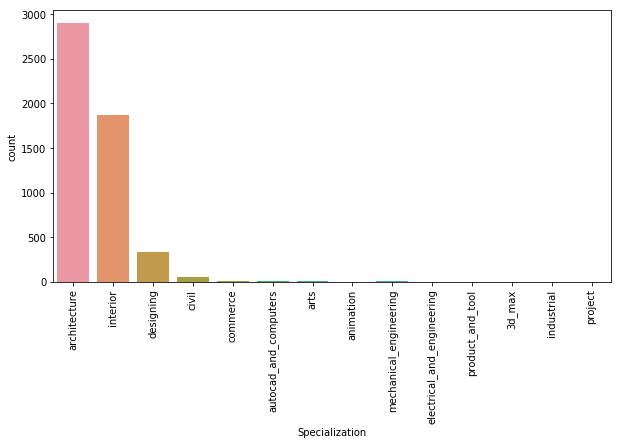

In [12]:
#bar plot of Specialization
plt.figure(figsize=(10,5))
chart=sns.countplot(x='Specialization',data=demo2,order = final_status['Specialization'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa65105ec88>],
      dtype=object)

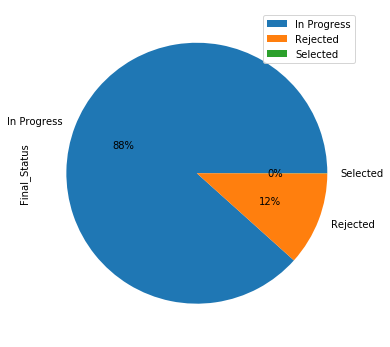

In [13]:
#Pie chart of Final Status
d=pd.DataFrame(final_status["Final_Status"].value_counts())
d.plot.pie(subplots=True, figsize=(6, 6), autopct='%1.0f%%')

Text(0, 0.5, 'Source')

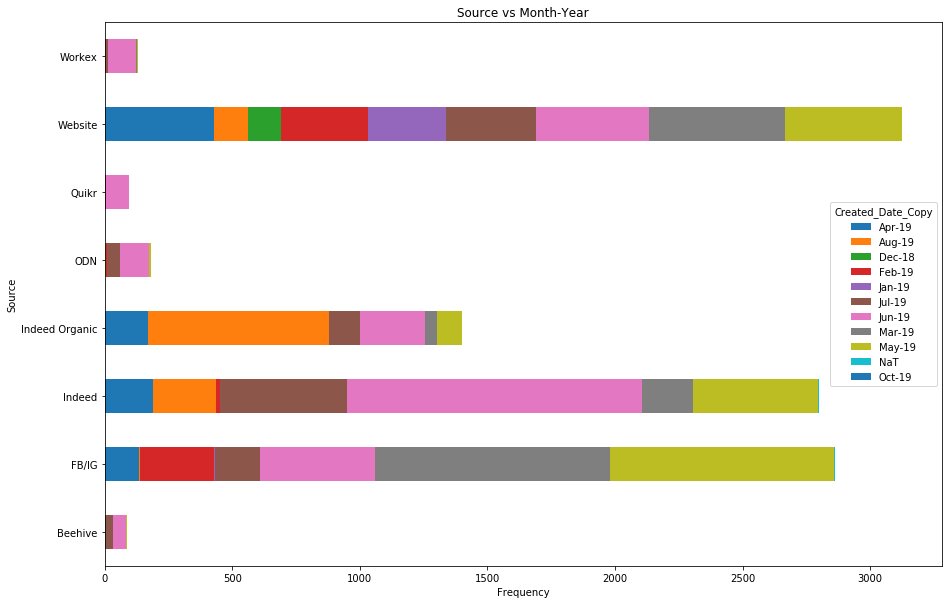

In [14]:
fig, ax1 = plt.subplots(figsize=(15, 10))
date=demo2['Created_Date_Copy'].dt.strftime('%b-%y')
fig=pd.crosstab(demo2.Source,date).plot(kind='barh', stacked=True,ax=ax1)
plt.title('Source vs Month-Year')
plt.xlabel('Frequency')
plt.ylabel('Source')
#plt.figure(figsize=(25,20))

Text(0, 0.5, 'Frequency')

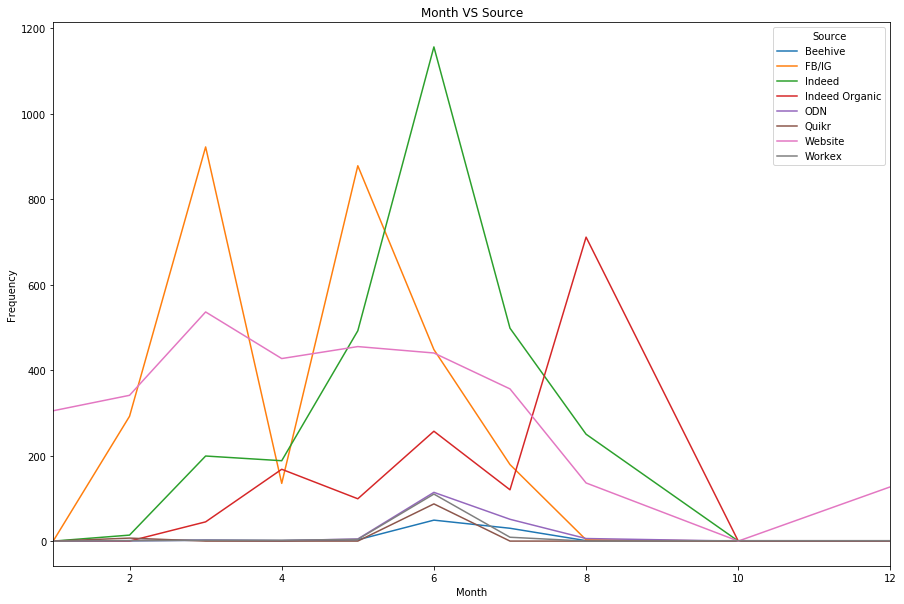

In [15]:
#plot trend of each Source w.r.t months
clarity_days = pd.crosstab(index=demo2["Created_Date_Copy"].dt.month, columns=demo2["Source"])
fig, ax1 = plt.subplots(figsize=(15, 10))
clarity_days.plot(ax=ax1)
plt.title('Month VS Source')
plt.xlabel('Month')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

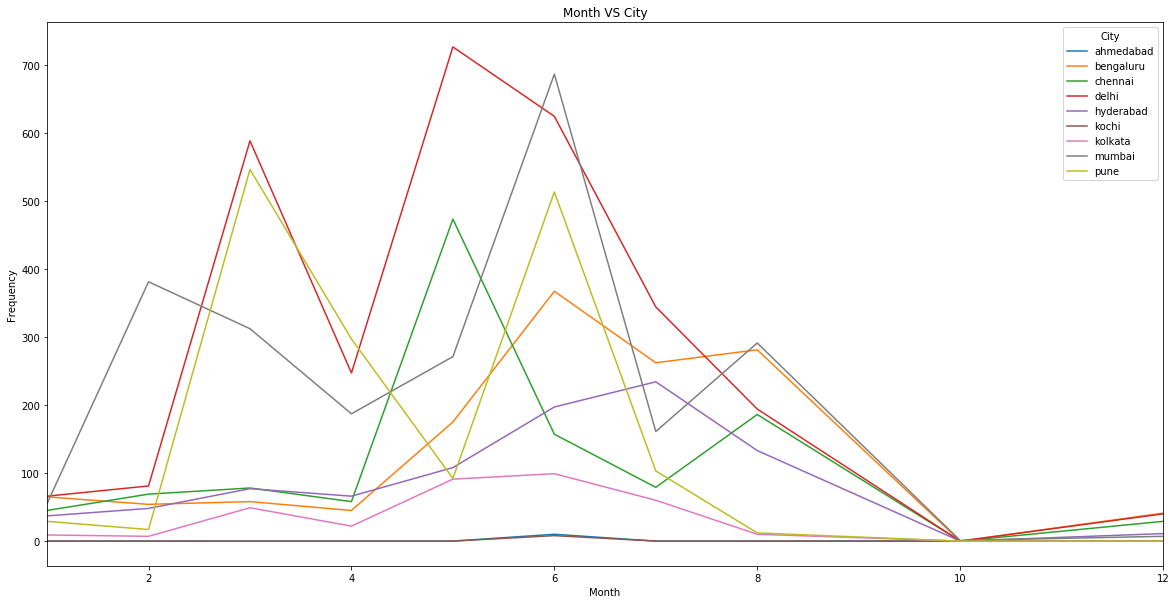

In [16]:
#line chart of Month vs City
fig, ax1 = plt.subplots(figsize=(20,10))
clarity_status_source = pd.crosstab(index=demo2["Created_Date_Copy"].dt.month, columns=demo2["City"])
clarity_status_source.plot(kind='line',ax =ax1)
plt.title('Month VS City')
plt.xlabel('Month')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

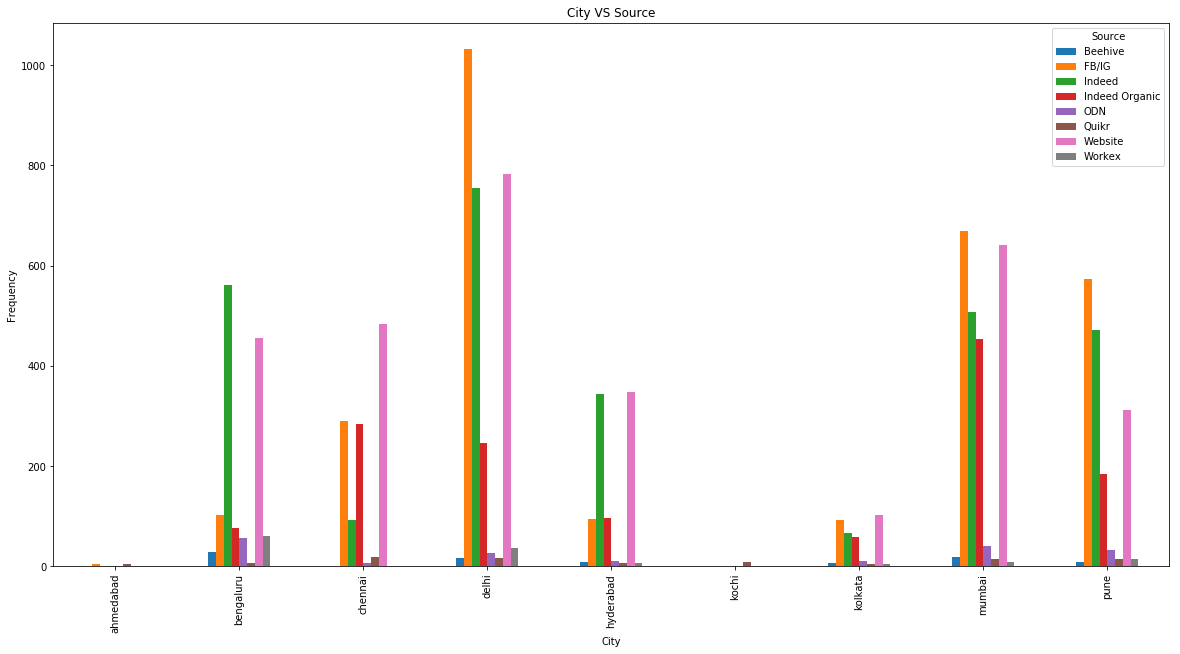

In [17]:
#line chart of City vs Source
fig, ax1 = plt.subplots(figsize=(20,10))
clarity_status_source = pd.crosstab(index=demo2["City"], columns=demo2["Source"])
clarity_status_source.plot(kind='bar',ax =ax1)
plt.title('City VS Source')
plt.xlabel('City')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

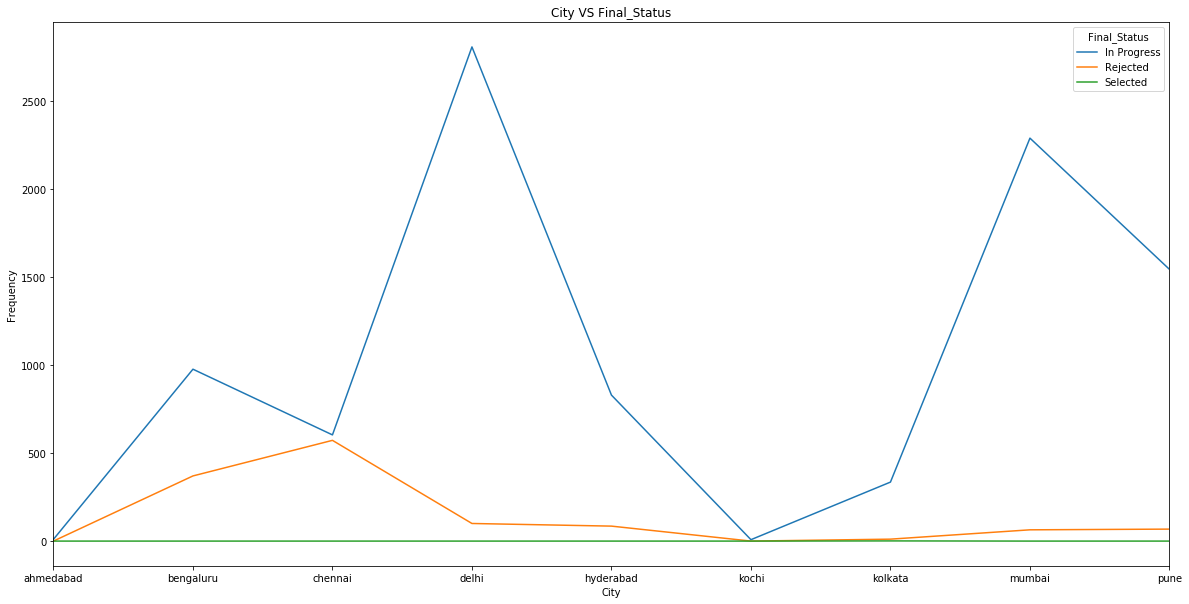

In [18]:
#line chart of dayDiff vs Status
fig, ax1 = plt.subplots(figsize=(20,10))
clarity_status_source = pd.crosstab(index=demo2["City"], columns=demo2["Final_Status"])
clarity_status_source.plot(kind='LINE',ax =ax1)
plt.title('City VS Final_Status')
plt.xlabel('City')
plt.ylabel('Frequency')

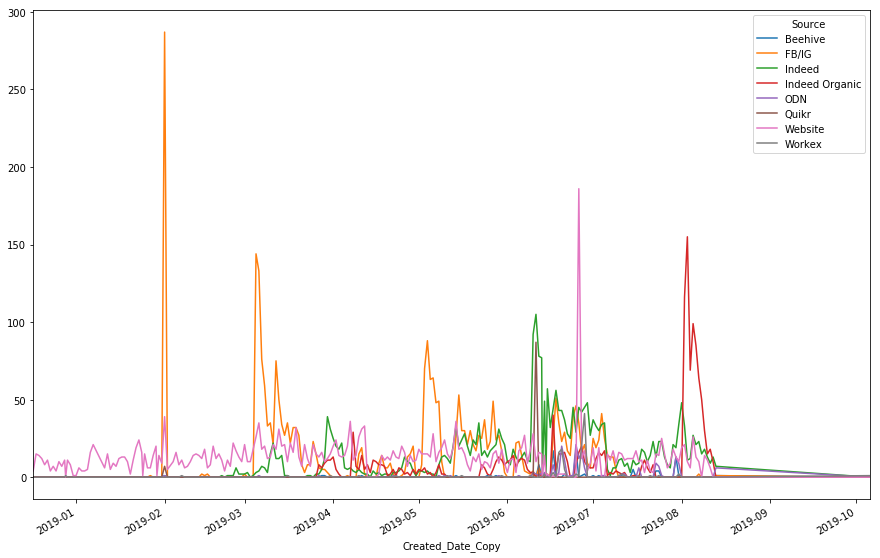

In [19]:
#plot trend of each Source w.r.t months
clarity_date = pd.crosstab(index=demo2["Created_Date_Copy"], columns=demo2["Source"])
fig, ax1 = plt.subplots(figsize=(15, 10))
date_Source = pd.DataFrame()
date_Source= clarity_date
date_Source

date_Source.plot(kind='line',ax =ax1)

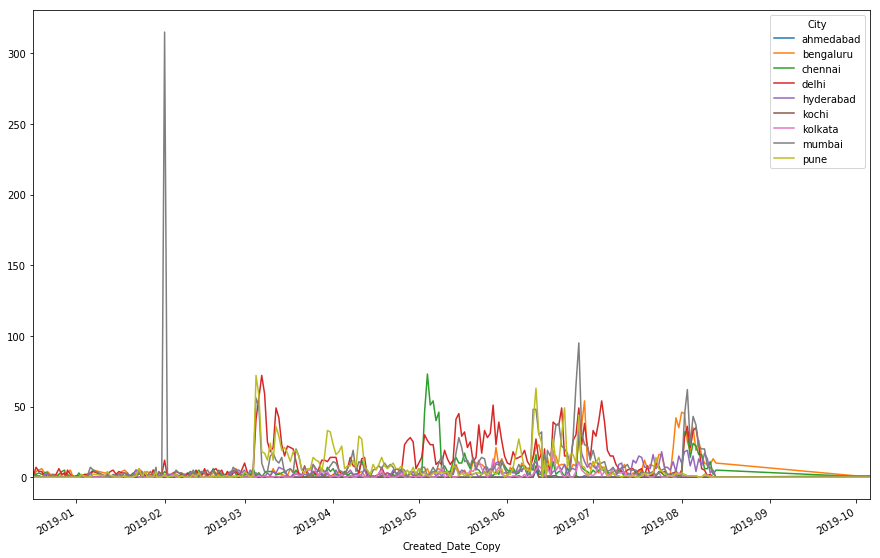

In [20]:
#plot trend of each Source w.r.t months
clarity_date = pd.crosstab(index=demo2["Created_Date_Copy"], columns=demo2["City"])
fig, ax1 = plt.subplots(figsize=(15, 10))
date_Source = pd.DataFrame()
date_Source= clarity_date
date_Source

date_Source.plot(kind='line',ax =ax1)

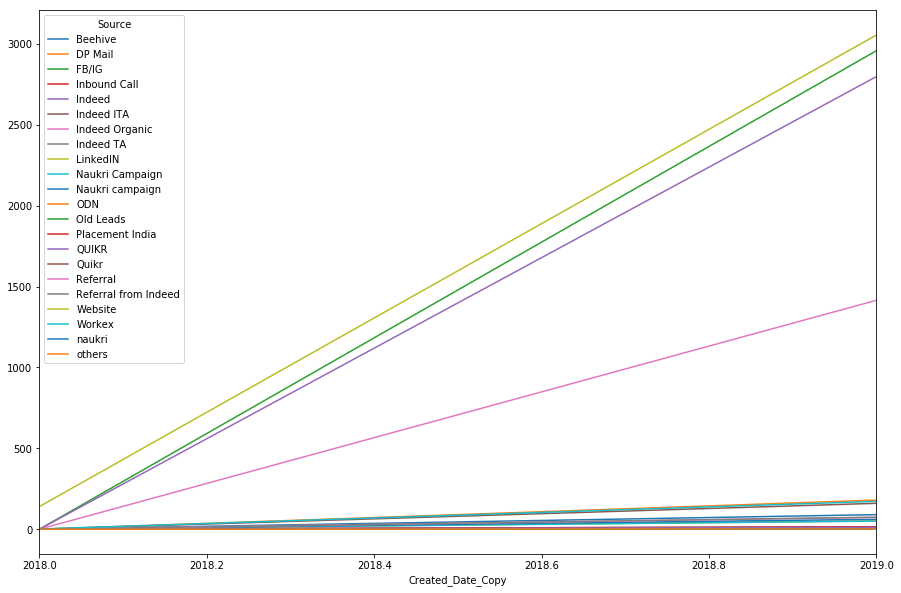

In [21]:
#year and source
fig, ax1 = plt.subplots(figsize=(15, 10))
a = pd.crosstab(demo1["Created_Date_Copy"].dt.year, columns=demo1["Source"])
a.plot(kind='line',ax =ax1)

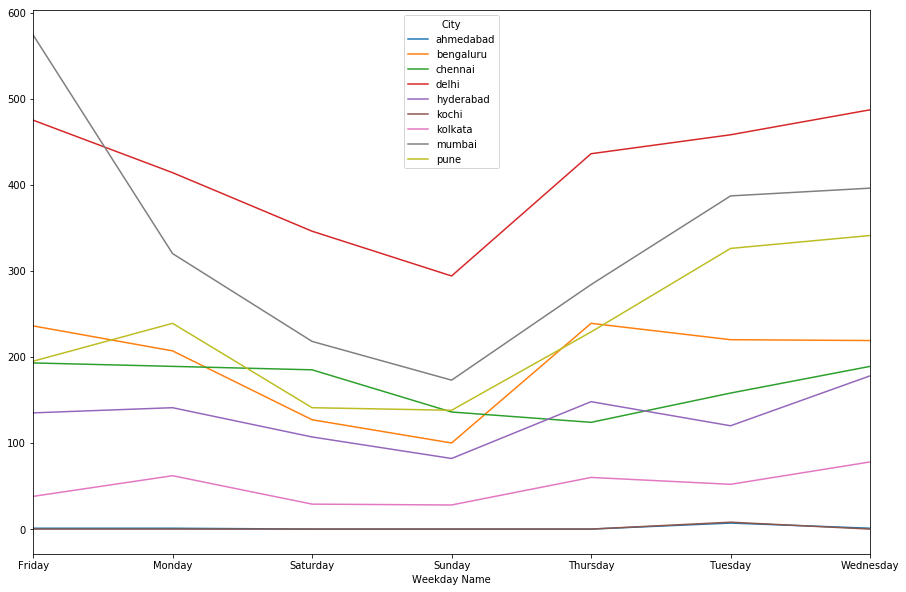

In [22]:
#top city based on created_date wrt Weekday_names
weekday = pd.crosstab(index=demo2["Weekday Name"], columns=demo2["City"])
fig, ax1 = plt.subplots(figsize=(15, 10))
day_city = pd.DataFrame()
day_city= weekday
day_city.plot(kind='line',ax =ax1)

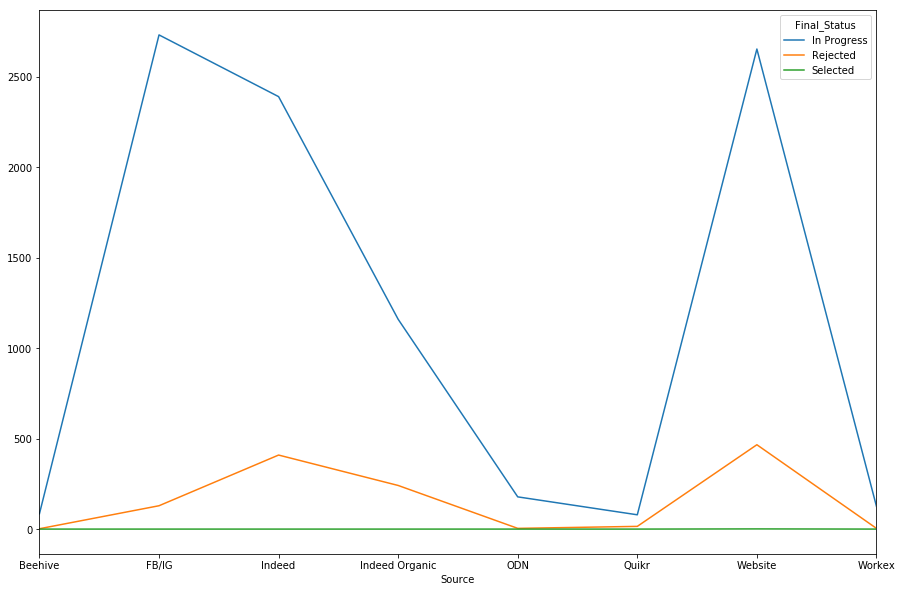

In [23]:
fig, ax1 = plt.subplots(figsize=(15, 10))
clarity_status_source = pd.crosstab(index=demo2.Source, columns=demo2["Final_Status"]).plot(kind='line',ax =ax1)

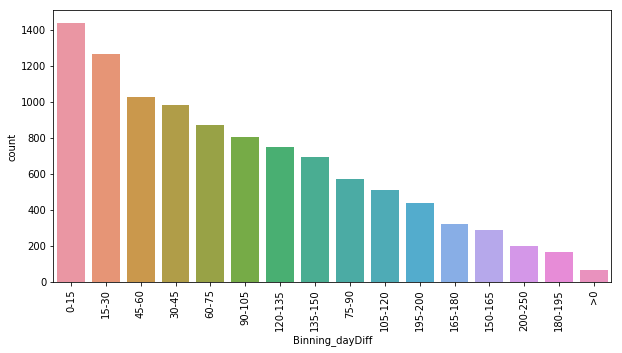

In [24]:
#bar plot of Specialization
plt.figure(figsize=(10,5))
chart=sns.countplot(x='Binning_dayDiff',data=demo1,order = demo1['Binning_dayDiff'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

Text(0, 0.5, 'Frequency')

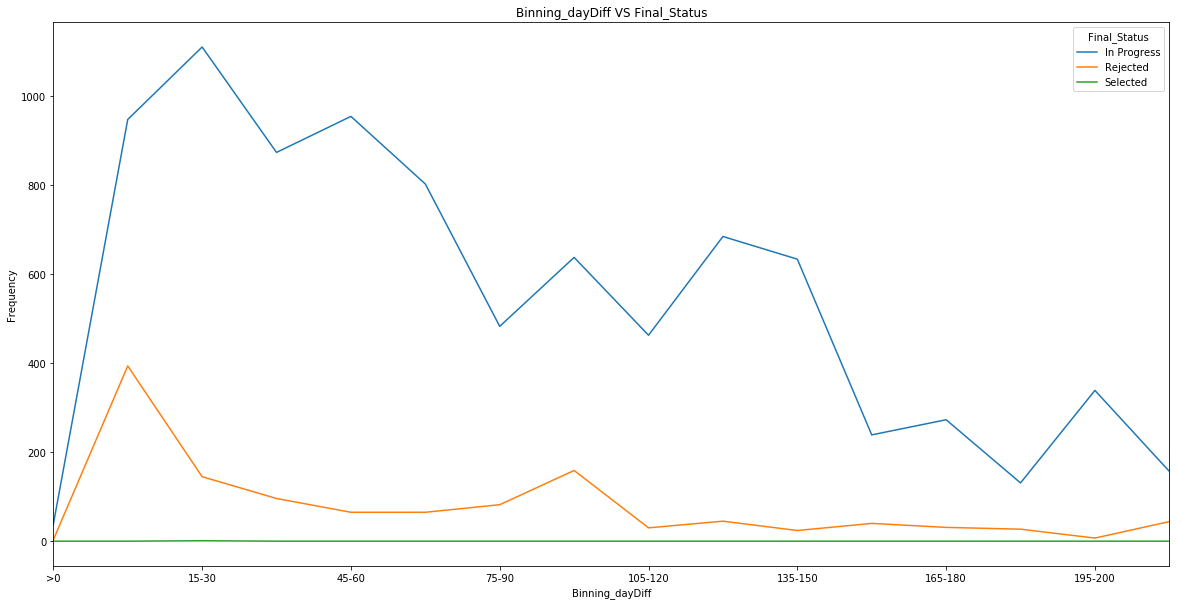

In [25]:
#line chart of dayDiff vs Status
fig, ax1 = plt.subplots(figsize=(20,10))
clarity_status_source = pd.crosstab(index=demo2["Binning_dayDiff"], columns=demo2["Final_Status"])
clarity_status_source.plot(kind='LINE',ax =ax1)
plt.title('Binning_dayDiff VS Final_Status')
plt.xlabel('Binning_dayDiff')
plt.ylabel('Frequency')

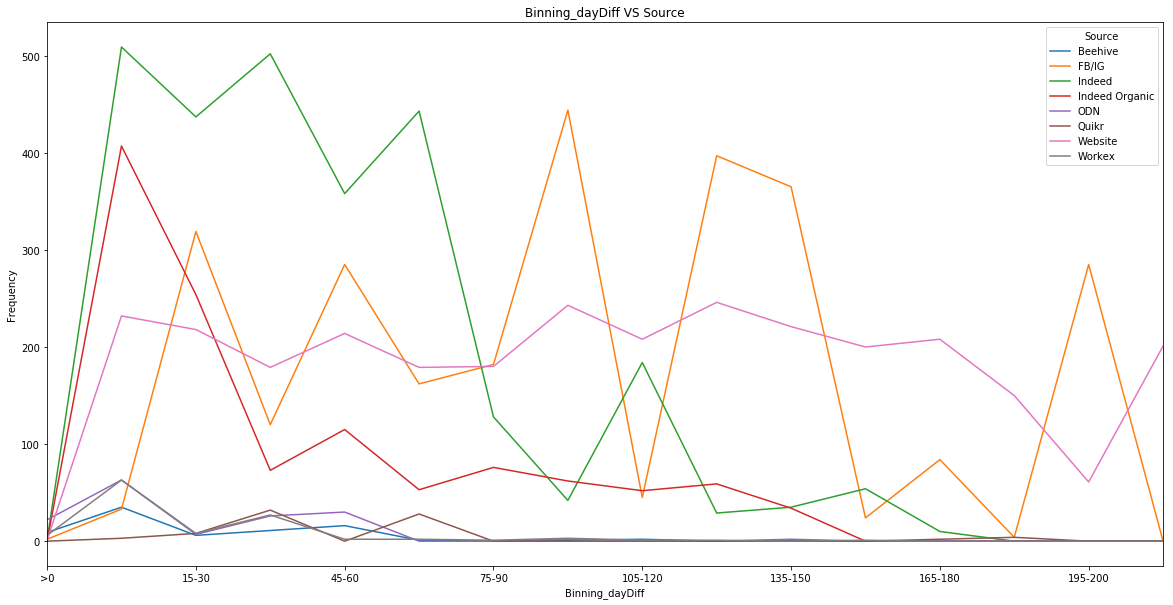

In [26]:
#line chart of dayDiff vs Status
fig, ax1 = plt.subplots(figsize=(20,10))
clarity_status_source = pd.crosstab(index=demo2["Binning_dayDiff"], columns=demo2["Source"])
clarity_status_source.plot(kind='LINE',ax =ax1)
plt.title('Binning_dayDiff VS Source')
plt.xlabel('Binning_dayDiff')
plt.ylabel('Frequency')
plt.show()

In [27]:
demo

,Name,Email,Phone,Degree,City,Specialization,Experience,Qualification,Final_Status,Exp,Basic_Qualification_Survey,Job_Fair_Date_Targetted,Source,Created_Date,Candidate_Stage,Candidate_Status
0,Sambhav Garg,SambhavGarg09@gmail.com,9582325040,Diploma,delhi,architecture,NaN,diploma in architecturedesign,In Progress,I’m a Fresher,Type Form,7/23/2019,Website,12/17/2018,Fresh Lead,Fresh Lead
1,hlgki gk,jhcgjch@gmail.com,9100000000,Degree,chennai,architecture,NaN,bachelors in architecturedesign,Rejected,Less than 2 years,Type Form,8/13/2019,Website,12/17/2018,Fresh Lead,Lost
2,sreekhanth,saisreekhanth@gmail.com,8121445564,Degree,hyderabad,architecture,NaN,bachelors in architecturedesign,In Progress,I’m a Fresher,Type Form,7/16/2019,Website,12/17/2018,Fresh Lead,Fresh Lead
3,chandrasekar,chandru29262@gmail.com,9543029262,Diploma,chennai,architecture,2-5.,diploma in architecturedesign,In Progress,2 - 5 Years,Type Form,8/13/2019,Website,12/17/2018,Fresh Lead,Fresh Lead
4,anurag,anuragdec87@gmail.com,9871192009,Other,delhi,interior,5.,no formal design education but has work experi...,In Progress,5 years and above,Type Form,7/23/2019,Website,12/18/2018,Fresh Lead,Fresh Lead
5,Ridhima Gupta,thedesigncove8@gmail.com,9818866775,Degree,delhi,architecture,5.,bachelors in architecturedesign,In Progress,5 years and above,Type Form,7/23/2019,Website,12/18/2018,Fresh Lead,Fresh Lead
6,rishab,rishabjain097@gmail.com,8851818085,Other,delhi,interior,2-5.,no formal design education but has work experi...,In Progress,2 - 5 Years,Type Form,7/23/2019,Website,12/18/2018,Fresh Lead,Fresh Lead
7,Swati Thapar,swatithapar0530@gmail.com,9654342661,Masters,delhi,architecture,2-5.,masters in architecturedesign,In Progress,2 - 5 Years,Type Form,7/23/2019,Website,12/18/2018,Fresh Lead,Fresh Lead
8,Aarthy Manivannan,Manivannanaarthy@gmail.com,6385463512,Degree,chennai,architecture,NaN,bachelors in architecturedesign,Rejected,Less than 2 years,Type Form,8/13/2019,Website,12/18/2018,Fresh Lead,Lost
9,Shraddha Andani,shraddha.andani94@gmail.com,9871873690,Degree,delhi,architecture,2-5.,bachelors in architecturedesign,In Progress,2 - 5 Years,Type Form,7/23/2019,Website,12/18/2018,Fresh Lead,Fresh Lead


In [30]:
demo1['City'].value_counts()

delhi          3020
mumbai         2455
pune           1637
bengaluru      1421
chennai        1201
hyderabad       939
kolkata         363
ahmedabad        10
kochi             8
dehradun          7
nagpur            5
surat             5
jaipur            4
goa               4
kolhapur          4
rajkot            3
thrissur          3
udaipur           3
ranchi            3
nellore           3
kozhikode         3
patna             3
sangli            2
narnaul           2
palwal            2
coimbatore        2
indore            2
kasaragod         2
kakinada          2
navsari           2
               ... 
sahibabad         1
malvan            1
muradnagar        1
solapur           1
chiplun           1
gujarat           1
chirimiri         1
canada            1
vasaivirar        1
tinsukia          1
etawah            1
agartala          1
chinchwad         1
dehra             1
bhiwadi           1
hubli             1
sujanpur          1
khairthabad       1
maunath           1


In [35]:
#import pandas_profiling as pp
#pp = pp.ProfileReport(demo1)
#pp.to_file(output_file="demo1-Visualization_usecase2_reportdata")

### 